<a href="https://colab.research.google.com/github/danielarruda1000/credit_card_clustering/blob/main/credit_card_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Credit Card Clustering
This case requires to develop a customer segmentation to define marketing strategy. The
sample Dataset summarizes the usage behavior of about 9000 active credit card holders during the last 6 months. The file is at a customer level with 18 behavioral variables.

#### Following is the Data Dictionary for Credit Card dataset :-

* CUSTID : Identification of Credit Card holder (Categorical)
* BALANCE : Balance amount left in their account to make purchases (
* BALANCEFREQUENCY : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
* PURCHASES : Amount of purchases made from account
* ONEOFFPURCHASES : Maximum purchase amount done in one-go
* INSTALLMENTSPURCHASES : Amount of purchase done in installment
* CASHADVANCE : Cash in advance given by the user
* PURCHASESFREQUENCY : How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
* ONEOFFPURCHASESFREQUENCY : How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
* PURCHASESINSTALLMENTSFREQUENCY : How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
* CASHADVANCEFREQUENCY : How frequently the cash in advance being paid
* CASHADVANCETRX : Number of Transactions made with "Cash in Advanced"
* PURCHASESTRX : Numbe of purchase transactions made
* CREDITLIMIT : Limit of Credit Card for user
* PAYMENTS : Amount of Payment done by user
* MINIMUM_PAYMENTS : Minimum amount of payments made by user
* PRCFULLPAYMENT : Percent of full payment paid by user
* TENURE : Tenure of credit card service for user

# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings("ignore")

# Loading data

In [2]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive
%cd MyDrive/
%cd MIT DS
%cd Study\ case\ 2

Mounted at /gdrive
/gdrive
/gdrive/MyDrive
/gdrive/MyDrive/MIT DS
/gdrive/MyDrive/MIT DS/Study case 2


In [3]:
df = pd.read_csv('CC GENERAL.csv')

# Data analysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [5]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [6]:
## Univarite analysis

In [7]:
def plot_feature_distribution(col):
  f, (ax_box, ax_dist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

  sns.boxplot(df[col], ax=ax_box)
  sns.distplot(df[col], ax=ax_dist)
  ax_box.set(xlabel=col)
  plt.show()

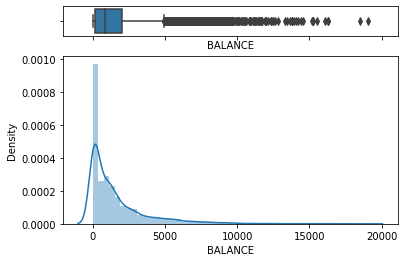

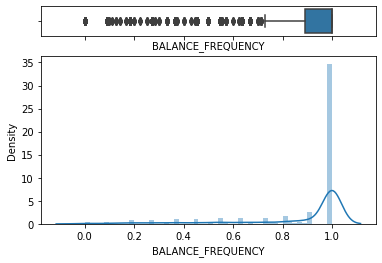

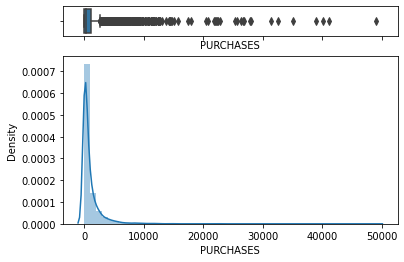

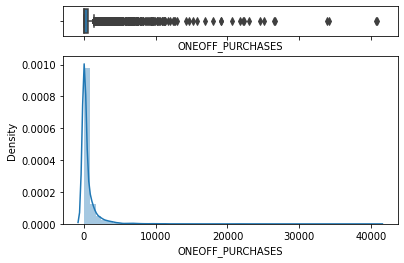

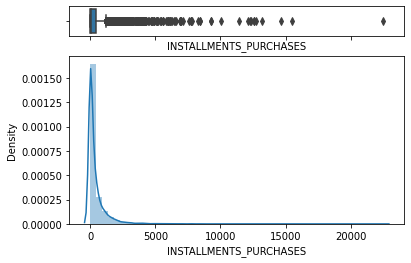

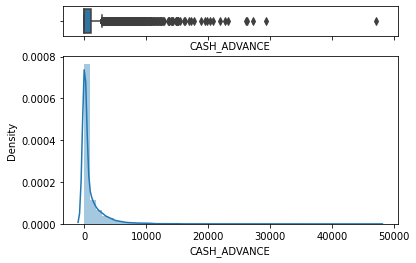

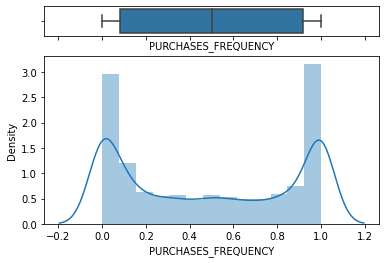

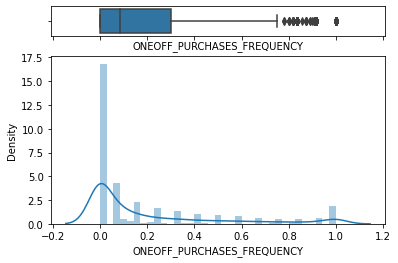

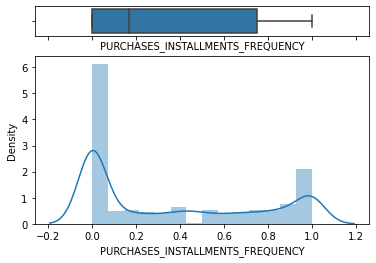

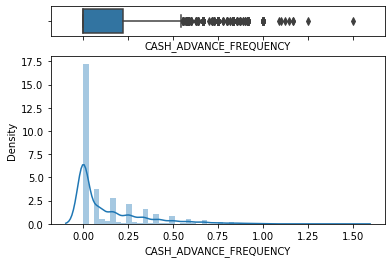

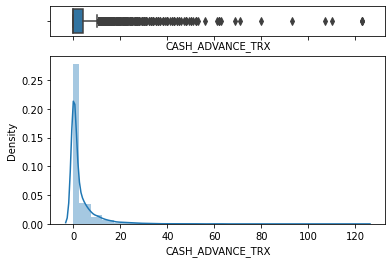

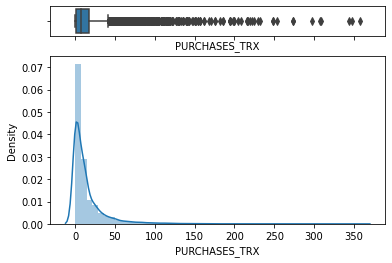

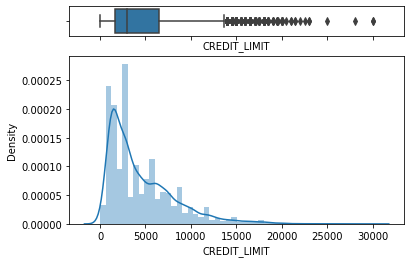

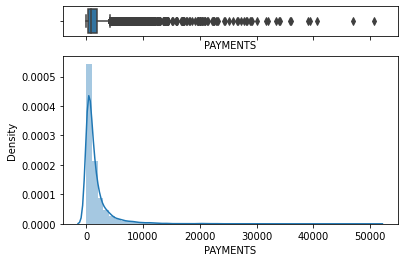

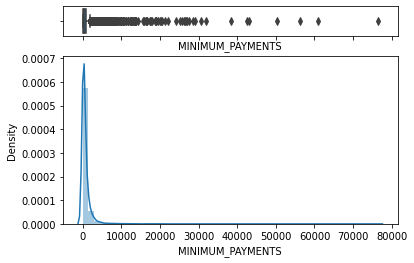

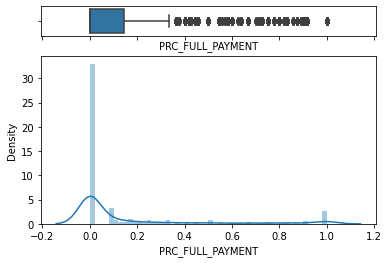

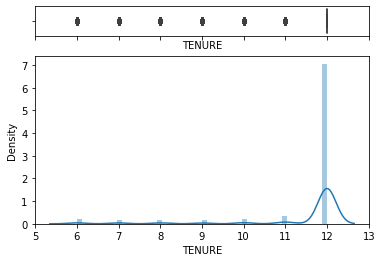

In [8]:
for col in df.select_dtypes(include=['int64', 'float64']).columns:
  plot_feature_distribution(col)
  print()

* Purchase Frequency shows up a two kinds of clientes: Low frequency and High Frequency. We can get a interesting insight for this clusterization when focus on increase purchase for groups with less frequency

* Balance frequency is almost 1 for general clients

* Purchase installments frequency has two kinds of clients (Low and High) in same way of Purchase Frequency

* There are few clients with high credit limit

* In general until 50 transactions are made

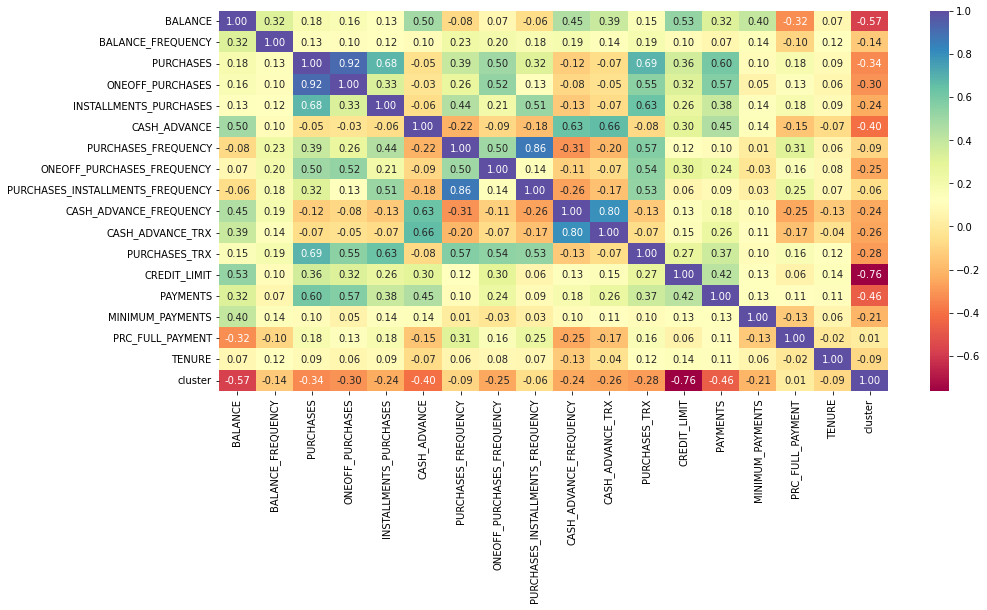

In [53]:
## Correlation
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(), annot=True, vmax=1, fmt='.2f',cmap='Spectral')
plt.show()

# Pre-process

#### Handle missing values

In [10]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [11]:
# Handle Missing values
df['MINIMUM_PAYMENTS'] = df['MINIMUM_PAYMENTS'].fillna(0)

# Adding most frequent Credit Limit for null credit limit
imputer = SimpleImputer(strategy='most_frequent')
df['CREDIT_LIMIT'] = imputer.fit_transform(df[['CREDIT_LIMIT']])

In [12]:
df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [13]:
df.drop(columns=['CUST_ID'], inplace=True)

### PCA

In [14]:
pca =PCA(n_components=0.95)
df_transformed = pca.fit_transform(df)

In [15]:
cols = [f'comp_{col}' for col in range(len(df_transformed[0]))]

In [16]:
df_transformed = pd.DataFrame(df_transformed, columns=cols)

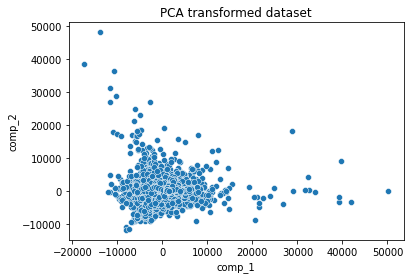

In [17]:
sns.scatterplot(data= df_transformed, x='comp_1', y='comp_2')
plt.title('PCA transformed dataset')
plt.show()

# Applying Kmeans

## Optimal number of clusters

In [18]:
kmeans_models = [KMeans(n_clusters=k, random_state=23).fit(df_transformed) for k in range(1,10)]

In [19]:
innertia = [model.inertia_ for model in kmeans_models]

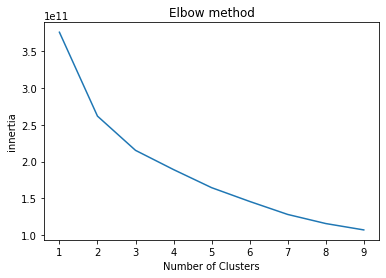

In [20]:
plt.plot(range(1, 10), innertia)
plt.title('Elbow method')
plt.xlabel('Number of Clusters')
plt.ylabel('innertia')
plt.show()

## Silhouette score to confirm optimal number of clusters

In [21]:
silhoutte_scores = [silhouette_score(df_transformed, model.labels_) for model in kmeans_models[1:4]]

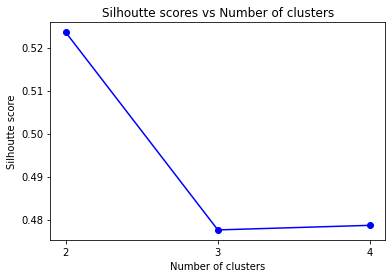

In [22]:
plt.plot(range(2,5), silhoutte_scores, "bo-")
plt.xticks([2, 3, 4])
plt.title('Silhoutte scores vs Number of clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Silhoutte score')
plt.show()

Two clusters is ideal

## Fiting Kmeans

In [23]:
kmeans = KMeans(n_clusters=2, random_state=23)
kmeans.fit(df_transformed)

sl_core = silhouette_score(df_transformed, kmeans.labels_)

print(f'Silhouette Score: {round(sl_core,2)}')

Silhouette Score: 0.52


In [25]:
df_transformed['cluster'] = kmeans.labels_

## Cluster Analysis

In [36]:
df['cluster'] = kmeans.labels_

In [54]:
df.groupby('cluster').mean()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
cluster,,,,,,,,,,,,,,,,,
0,3868.913122,0.939783,2387.444018,1565.091747,822.742927,2616.855821,0.559554,0.347101,0.407487,0.228542,6.618846,28.228692,9867.974878,4335.420721,1767.608343,0.149287,11.741133
1,947.978023,0.860547,632.885074,332.227186,300.933866,540.667867,0.471837,0.163762,0.352920,0.110158,2.347260,11.093188,3056.680865,1036.967531,584.214664,0.154899,11.457442


* Cluster 1 has clients with low balance and credit limit, but both have similar purchase frequency

* Cluster 0 make more one off purchases, maybe for credit limit high.

* Both clusters don't pay full payment (~15%)

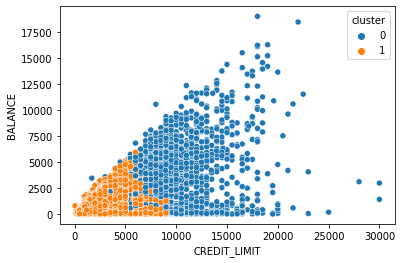

In [48]:
sns.scatterplot(data=df, x='CREDIT_LIMIT', y='BALANCE', hue='cluster')

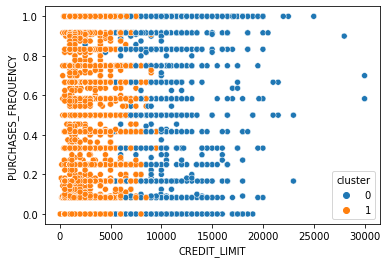

In [49]:
sns.scatterplot(data=df, x='CREDIT_LIMIT', y='PURCHASES_FREQUENCY', hue='cluster')

As we can see, Credit Limit make the main diference between clusters. They have almost same purchase frequency. For a marketing strategy grow credit card limit for clients in cluster 1 maybe increase balance (Correlation plot show 0.57 for Balance vs Credit Limit)